In [1]:
import pandas as pd

In [5]:
train_data_dir ='train.csv'
test_data_dir  = 'test.csv'

In [6]:
train_data = pd.read_csv(train_data_dir)
test_data = pd.read_csv(test_data_dir)

In [7]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
num_samples = 5
selected_rows = train_data.sample(num_samples)

In [10]:
labels = selected_rows['label']
pixels = selected_rows.drop(columns=['label'])

In [11]:
images = pixels.values.reshape(-1, 28, 28)

In [12]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

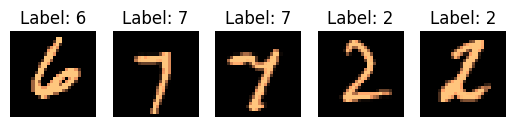

In [13]:
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i], cmap='copper')
    plt.title(f"Label: {labels.iloc[i]}")
    plt.axis('off')
plt.show()

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [15]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [16]:
train_pixels = train_df.drop(columns=['label']).values
train_labels = train_df['label'].values

In [17]:
train_pixels = train_pixels / 255.0

In [18]:
train_images = train_pixels.reshape(-1, 28, 28, 1)

In [19]:
train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images,
    train_labels,
    test_size=0.2,
    random_state=42
)

In [20]:
tf.random.set_seed(42)

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_data = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=32,
    seed=42
)
valid_data = valid_datagen.flow(
    x=valid_images,
    y=valid_labels,
    batch_size=32,
    seed=42
)

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [25]:
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5
632/632 [==============================] - 20s 30ms/step - loss: 2.1529 - accuracy: 0.1951 - val_loss: nan - val_accuracy: 0.8182
Epoch 2/5
632/632 [==============================] - 18s 29ms/step - loss: 0.3948 - accuracy: 0.8831 - val_loss: nan - val_accuracy: 0.9150
Epoch 3/5
632/632 [==============================] - 21s 33ms/step - loss: 0.2564 - accuracy: 0.9246 - val_loss: nan - val_accuracy: 0.9325
Epoch 4/5
632/632 [==============================] - 20s 32ms/step - loss: 0.2047 - accuracy: 0.9396 - val_loss: nan - val_accuracy: 0.9382
Epoch 5/5
632/632 [==============================] - 19s 30ms/step - loss: 0.1735 - accuracy: 0.9462 - val_loss: nan - val_accuracy: 0.9491


In [26]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

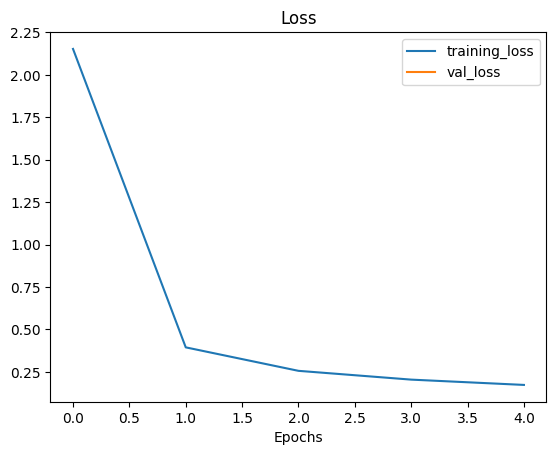

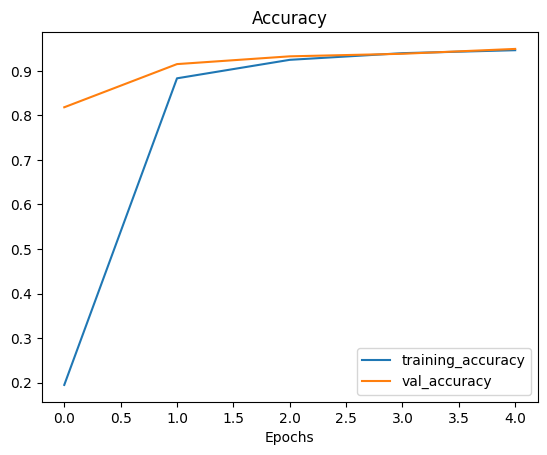

In [27]:
plot_loss_curves(history)

In [28]:
test_pixels = test_df.values / 255.0  # Normalize the pixel values
test_images = test_pixels.reshape(-1, 28, 28, 1)

In [29]:
predictions = model.predict(test_images)

808/808 [==============================] - 7s 9ms/step


In [30]:
predicted_labels = np.argmax(predictions, axis=1)

In [31]:
image_ids = range(1, len(predicted_labels) + 1)
submission_df = pd.DataFrame({'ImageId': image_ids, 'Label': predicted_labels})

In [32]:
submission_df.to_csv('submission.csv', index=False)

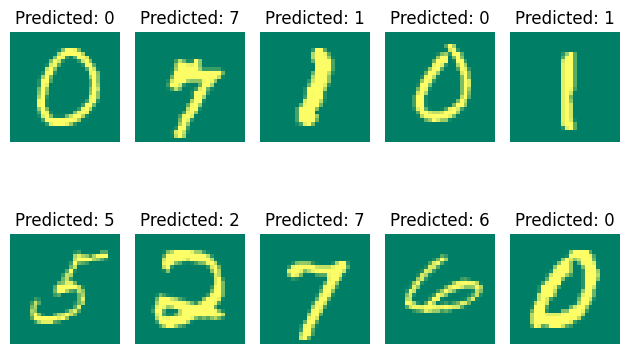

In [47]:
import matplotlib.pyplot as plt

# Display some random test images with their predicted labels
num_samples_to_display = 10
random_indices = np.random.choice(len(predicted_labels), num_samples_to_display, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='summer')
    plt.title(f'Predicted: {predicted_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()